# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

## Global attributes
Define the global attributes

In [4]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'
df = pd.read_csv(input_dataroot)
input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']

#temperature
x1 = []
x2 = []
x3 = []
#cities
y1 = [] #CityA
y2 = [] #CityB
y3 = [] #CityC

pred1 = []
pred2 = []
pred3 = []

y1_pred = [] #final output for A
y2_pred = [] #final output for B
y3_pred = [] #final output for C

x1_train = []
x1_test = []
y1_train = []
y1_test = []

x2_train = []
x2_test = []
y2_train = []
y2_test = []

x3_train = []
x3_test = []
y3_train = []
y3_test = []

result_y1_test = [] 
result_y2_test = []
result_y3_test = []

m = 0
b = 0
m1 = 0
b1 = 0
m2 = 0
b2 = 0



You can add your own global attributes here


In [5]:
testing_datalist = []
training_datalist = []
date_datalist = []

## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [6]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))
#print(input_datalist)
#total_input_datalist = len(input_datalist)
#test_output_datalist = input_datalist[-10:]


## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [7]:
def SplitData():
  global testing_datalist, training_datalist

  for index, data in enumerate(input_datalist):
    if index == 0:
      continue

    if index <= len(input_datalist) - 11:
      training_datalist.append(data)
    else:
      testing_datalist.append(data)

  testing_datalist = np.array(testing_datalist)
  training_datalist = np.array(training_datalist)

  

### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [8]:
def PreprocessData():
  global training_datalist, x1, y1, x2, y2, x3, y3,testing_datalist, pred1,pred2,pred3,x1_train,x1_test,y1_train,y1_test,x2_train,x2_test,x3_train,x3_test,y2_train,y2_test,y3_train,y3_test

  for [epiweek, TempA, TempB, TempC, CityA, CityB, CityC] in training_datalist:
    if TempA == '' or TempB == '' or TempC == '':
      continue
    
    x1.append(float(TempA.replace(',','')))
    y1.append(int(CityA.replace(',','')))
    x2.append(float(TempB.replace(',','')))
    y2.append(int(CityB.replace(',','')))
    x3.append(float(TempC.replace(',','')))
    y3.append(int(CityC.replace(',','')))
  
  for [epiweek, TempA, TempB, TempC, CityA, CityB, CityC] in testing_datalist:
    date_datalist.append(int(epiweek))
    pred1.append(float(TempA.replace(',','')))
    pred2.append(float(TempB.replace(',','')))
    pred3.append(float(TempC.replace(',','')))


  pred1 = np.array(pred1)
  pred2 = np.array(pred2)
  pred3 = np.array(pred3)

  pred1_mean, pred1_std = np.mean(pred1), np.std(pred1)
  pred2_mean, pred2_std = np.mean(pred2), np.std(pred2)
  pred3_mean, pred3_std = np.mean(pred3), np.std(pred3)

  cut_offpred1 = pred1_std*3
  cut_offpred2 = pred2_std*3
  cut_offpred3 = pred3_std*3

  lower1, upper1 = pred1_mean - cut_offpred1, pred1_mean + cut_offpred1
  lower2, upper2 = pred2_mean - cut_offpred2, pred2_mean + cut_offpred2
  lower3, upper3 = pred3_mean - cut_offpred3, pred3_mean + cut_offpred3
  

#removing outliers for each city
  for i,j in enumerate(x1):
    if j < lower1 or j >upper1:
      x1.pop(i)
      y1.pop(i)

  for i,j in enumerate(x2):
    if j < lower2 or j >upper2:
      x2.pop(i)
      y2.pop(i) 

  for i,j in enumerate(x3):
    if j < lower3 or j >upper3:
      x3.pop(i)
      y3.pop(i) 
  
  x1 = np.array(x1)
  y1 = np.array(y1)
  x2 = np.array(x2)
  y2 = np.array(y2)
  x3 = np.array(x3)
  y3 = np.array(y3)

  '''--------------------CityA's training-----------------------'''
  for index, data in enumerate(x1):
    if index <= len(x1)*0.80:
      x1_train.append(data)
    else:
      x1_test.append(data)

  x1_train = np.array(x1_train)
  x1_test = np.array(x1_test)

  for index, data in enumerate(y1):
    if index <= len(y1)*0.80:
      y1_train.append(data)
    else:
      y1_test.append(data)

  y1_train = np.array(y1_train)
  y1_test = np.array(y1_test)

  '''--------------------CityB's training-----------------------'''
  for index, data in enumerate(x2):
    if index <= len(x2)*0.80:
      x2_train.append(data)
    else:
      x2_test.append(data)

  x2_train = np.array(x2_train)
  x2_test = np.array(x2_test)

  for index, data in enumerate(y2):
    if index <= len(y2)*0.80:
      y2_train.append(data)
    else:
      y2_test.append(data)

  y2_train = np.array(y2_train)
  y2_test = np.array(y2_test)

  '''--------------------CityC's training-----------------------'''
  for index, data in enumerate(x3):
    if index <= len(x3)*0.80:
      x3_train.append(data)
    else:
      x3_test.append(data)

  x3_train = np.array(x3_train)
  x3_test = np.array(x3_test)

  for index, data in enumerate(y3):
    if index <= len(y3)*0.80:
      y3_train.append(data)
    else:
      y3_test.append(data)

  y3_train = np.array(y3_train)
  y3_test = np.array(y3_test)

  #print(x3)
  #print(y3)

### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [9]:
def Regression():
  global m, b, m1, b1, m2, b2, x1_train, y1_train, x2_train, y2_train, x3_train, y3_train
  trainx = 0 
  trainy = 0
  trainx2 = 0 
  trainy2 = 0
  trainx3 = 0 
  trainy3 = 0

  learning_rate = 0.000017
  learning_rate2 = 0.00017 #before 15
  learning_rate3 = 0.000117 #before 115

  for index,data in enumerate(x1_train):
    trainx = x1_train[index]
    trainy = y1_train[index]
    guess1 = m * trainx + b
    error1 = trainy - guess1 
    m = m + (error1 * trainx) * learning_rate
    b = b + (error1) * learning_rate

  #single model for 3 cities 
  for index1,data1 in enumerate(x2_train):
    trainx2 = x2_train[index1]
    trainy2 = y2_train[index1]
    guess2 = m1 * trainx2 + b1
    error2 = trainy2 - guess2 
    m1 = m1 + (error2 * trainx2) * learning_rate2
    b1 = b1 + (error2) * learning_rate2

  
  for index2,data2 in enumerate(x3_train):
    trainx3 = x3_train[index2]
    trainy3 = y3_train[index2]
    guess3 = m2 * trainx3 + b2
    error3 = trainy3 - guess3 
    m2 = m2 + (error3 * trainx3) * learning_rate3
    b2 = b2 + (error3) * learning_rate3


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [10]:
def MakePred():
  global m, b, m1, b1, m2, b2, y1_test, x1_test, result_y1_test, y2_test, x2_test, result_y2_test, y3_test, x3_test, result_y3_test

  '''---------------------- 3 training datalist's subtest ------------------------'''
  for index,data in enumerate(y1_test):
    result_y1_test.append(int(m*(x1_test[index])+b))
  #print("predA: ",result_y1_test)

  for index,data in enumerate(y2_test):
    result_y2_test.append(int(m1*(x2_test[index])+b1))
  #print("predB: ",result_y2_test)

  for index,data in enumerate(y3_test):
    result_y3_test.append(int(m2*(x3_test[index])+b2))
  #print("predC: ",result_y3_test)

  '''---------------------- 3 testing datalist ------------------------'''

  for index,data in enumerate(pred1):
    y1_pred.append(int(m*(pred1[index])+b))
  print("pred1: ",y1_pred)

  for index,data in enumerate(pred2):
    y2_pred.append(int(m1*(pred1[index])+b1))
  print("pred2: ",y2_pred)

  for index,data in enumerate(pred3):
    y3_pred.append(int(m2*(pred3[index])+b2))
  print("pred3: ",y3_pred)

### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





pred1:  [31, 28, 28, 29, 26, 23, 26, 30, 27, 28]
pred2:  [28, 25, 25, 26, 23, 21, 23, 27, 24, 25]
pred3:  [42, 39, 42, 40, 40, 36, 45, 39, 43, 43]
MAPE-A:  19.610730482759532 %
MAPE-B:  18.597193175400204 %
MAPE-C:  23.111128267617445 %
Coefficient of A (m and b):  1.071544389459766 0.04381674102324993
Coefficient of B (m1 and b1):  0.9529847780922234 0.04409200684477698
Coefficient of C (m2 and b2):  1.4855845365081457 0.058273239530078264


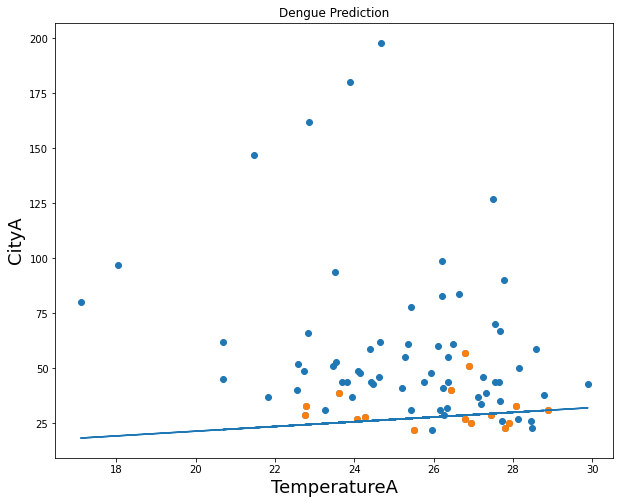

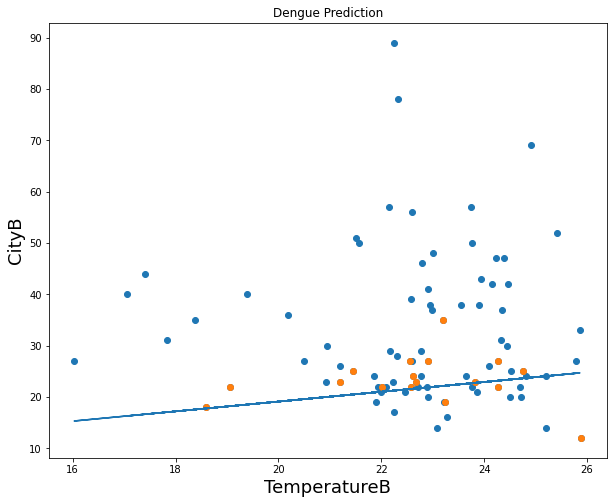

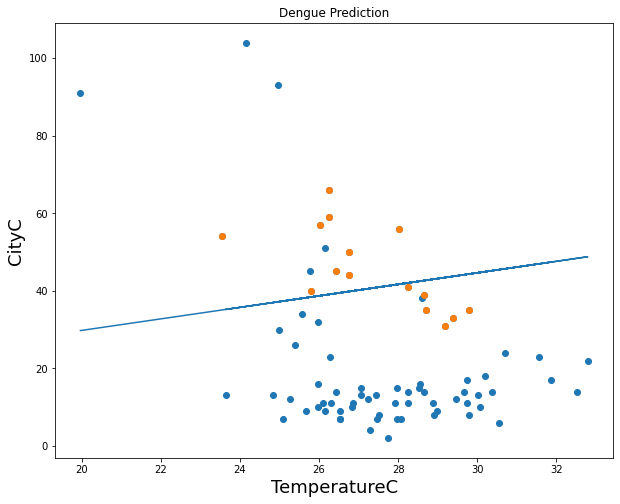

In [11]:
SplitData()
PreprocessData()
Regression()
MakePred()

'''----------------------- Compute Loss subtest1 --------------------------------'''
error1 = []
error2 = []
error3 = []
flag1 = 0 
flag2 = 0 
flag3 = 0 
#print("actual A: ",y1_test)
for i,j in enumerate(result_y1_test):
  flag1 = abs(y1_test[i]-result_y1_test[i])/y1_test[i] 
  error1.append(flag1)
meanval1 = sum(error1)/len(error1)
print("MAPE-A: ",meanval1*100,"%")

'''----------------------- Compute Loss subtest2 --------------------------------'''
#print("actual B: ",y2_test)
for i,j in enumerate(result_y2_test):
  flag2 = abs(y2_test[i]-result_y2_test[i])/y2_test[i] 
  error2.append(flag2)
meanval2 = sum(error2)/len(error2)
print("MAPE-B: ",meanval2*100,"%")

'''----------------------- Compute Loss subtest3 --------------------------------'''
#print("actual C: ",y3_test)
for i,j in enumerate(result_y3_test):
  flag3 = abs(y3_test[i]-result_y3_test[i])/y3_test[i] 
  error3.append(flag3)
meanval3 = sum(error3)/len(error3)
print("MAPE-C: ",meanval3*100,"%")


plt.figure(figsize=(10, 8))
plt.title("Dengue Prediction")
plt.xlabel('TemperatureA', fontsize=18)
plt.ylabel('CityA', fontsize=18)
plt.scatter(x1, y1)
plt.scatter(x1_test, y1_test,c = '#ff7f0e')
plt.plot(x1_train, m*(x1_train**1)+b)
print("Coefficient of A (m and b): " , m ,b)


plt.figure(figsize=(10, 8))
plt.title("Dengue Prediction")
plt.xlabel('TemperatureB', fontsize=18)
plt.ylabel('CityB', fontsize=18)
plt.scatter(x2, y2)
plt.scatter(x2_test, y2_test,c = '#ff7f0e')
plt.plot(x2_train, m1*(x2_train**1)+b1)
print("Coefficient of B (m1 and b1): ", m1,b1)


plt.figure(figsize=(10, 8))
plt.title("Dengue Prediction")
plt.xlabel('TemperatureC', fontsize=18)
plt.ylabel('CityC', fontsize=18)
plt.scatter(x3, y3)
plt.scatter(x3_test, y3_test,c = '#ff7f0e')
plt.plot(x3_train, m2*(x3_train**1)+b2)
print("Coefficient of C (m2 and b2): ", m2,b2)

out_datalist = []
temp = []
i = 0
while i < len(y1_pred):
  out_datalist.append([date_datalist[i], y1_pred[i], y2_pred[i], y3_pred[i]])
  i += 1
output_datalist = np.array(out_datalist)
#print(output_datalist)

## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [12]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)